In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import string
import re
from nltk.corpus import stopwords
from nltk import word_tokenize

In [2]:
data1 = pd.read_csv("Test.csv")
data2 = pd.read_csv("Train.csv")
data3 = pd.read_csv("Valid.csv")
data = pd.concat([data1,data2,data3],ignore_index=True)

In [3]:
data.head()

,text,label
0,I always wrote this series off as being a comp...,0
1,1st watched 12/7/2002 - 3 out of 10(Dir-Steve ...,0
2,This movie was so poorly written and directed ...,0
3,The most interesting thing about Miryang (Secr...,1
4,"when i first read about ""berlin am meer"" i did...",0


In [4]:
data['text'][0]

'I always wrote this series off as being a complete stink-fest because Jim Belushi was involved in it, and heavily. But then one day a tragic happenstance occurred. After a White Sox game ended I realized that the remote was all the way on the other side of the room somehow. Now I could have just gotten up and walked across the room to get the remote, or even to the TV to turn the channel. But then why not just get up and walk across the country to watch TV in another state? "Nuts to that", I said. So I decided to just hang tight on the couch and take whatever Fate had in store for me. What Fate had in store was an episode of this show, an episode about which I remember very little except that I had once again made a very broad, general sweeping blanket judgment based on zero objective or experiential evidence with nothing whatsoever to back my opinions up with, and once again I was completely right! This show is a total crud-pie! Belushi has all the comedic delivery of a hairy lightho

In [4]:
data.label.value_counts()

1    25000
0    25000
Name: label, dtype: int64

In [5]:
data = data.drop_duplicates()

In [6]:
data.label.value_counts()

1    24884
0    24698
Name: label, dtype: int64

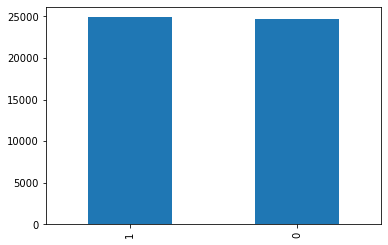

In [7]:
data.label.value_counts().plot.bar();

In [8]:
data['length'] = data['text'].apply(len)

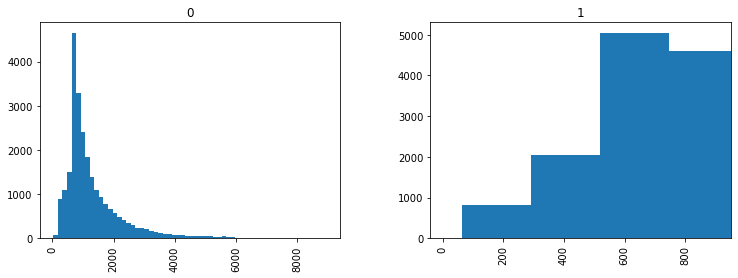

In [9]:
data.hist(column='length',by='label',bins=60,figsize=(12,4));
plt.xlim(-40,950);

In [10]:
def remove_punctuation_and_stopwords(sms):
    
    sms_no_punctuation = [ch for ch in sms if ch not in string.punctuation]
    sms_no_punctuation = "".join(sms_no_punctuation).split()
    
    liste = " ".join([x.lower() for x in sms_no_punctuation if not x.isdigit()]).split()

    new_list = []
    
    for word in liste:
        new_list.append(word)
                 
    sms_no_punctuation_no_stopwords = \
        [word.lower() for word in new_list if word not in stopwords.words('english')]
        
    review = " ".join(sms_no_punctuation_no_stopwords)
    return re.sub('\s+',' ', review)

In [11]:
data.head()

,text,label,length
0,I always wrote this series off as being a comp...,0,2105
1,1st watched 12/7/2002 - 3 out of 10(Dir-Steve ...,0,1070
2,This movie was so poorly written and directed ...,0,1402
3,The most interesting thing about Miryang (Secr...,1,4277
4,"when i first read about ""berlin am meer"" i did...",0,1013


In [12]:
data['text'] = data['text'].apply(lambda x:remove_punctuation_and_stopwords(x))

In [13]:
data.head()

,text,label,length
0,always wrote series complete stinkfest jim bel...,0,2105
1,1st watched 10dirsteve purcell typical mary ka...,0,1070
2,movie poorly written directed fell asleep minu...,0,1402
3,interesting thing miryang secret sunshine acto...,1,4277
4,first read berlin meer didnt expect much thoug...,0,1013


In [14]:
data['length2'] = data['text'].apply(len)

In [15]:
data.head()

,text,label,length,length2
0,always wrote series complete stinkfest jim bel...,0,2105,1350
1,1st watched 10dirsteve purcell typical mary ka...,0,1070,629
2,movie poorly written directed fell asleep minu...,0,1402,757
3,interesting thing miryang secret sunshine acto...,1,4277,2837
4,first read berlin meer didnt expect much thoug...,0,1013,647


In [18]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()
def stemmer(text):
    words = word_tokenize(text)
    new_text = []
    for word in words:
        stemmed_word = ps.stem(word)
        new_text.append(stemmed_word)
    return " ".join(new_text)
data['text'] = data['text'].apply(lambda x:stemmer(x))

In [20]:
data.head(10)

,text,label,length,length2
0,alway wrote seri complet stinkfest jim belushi...,0,2105,1350
1,1st watch 10dirstev purcel typic mari kate ash...,0,1070,629
2,movi poorli written direct fell asleep minut m...,0,1402,757
3,interest thing miryang secret sunshin actor je...,1,4277,2837
4,first read berlin meer didnt expect much thoug...,0,1013,647
5,saw film septemb 1st indianapoli one judg hear...,1,1887,1234
6,saw screen movi last night high expect go defi...,0,1470,929
7,william hurt may american matine idol anymor s...,1,955,727
8,piec crap funni whole movi noth ever happen al...,0,1092,587
9,im bout it1997br br develop publish limit film...,0,893,591


In [21]:
del data['length']
del data['length2']

In [22]:
data.to_csv("data_clean.csv",index=False)